In [ ]:
#LSTM predict the closing stock price of a corportaion (AAPL) using the past 60 days data. 
#Remeber important information and foreget unuseful data 


In [6]:
#Import the libraries 
import math 
import pandas_datareader as web 
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense,LSTM 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
import os

In [7]:
df = pd.read_csv("/AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575915,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.643497,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.783869,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.917507,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.897017,394024400


In [8]:
#Get number of rows and columns in the data set 
df.shape 

(2003, 7)

<function matplotlib.pyplot.show>

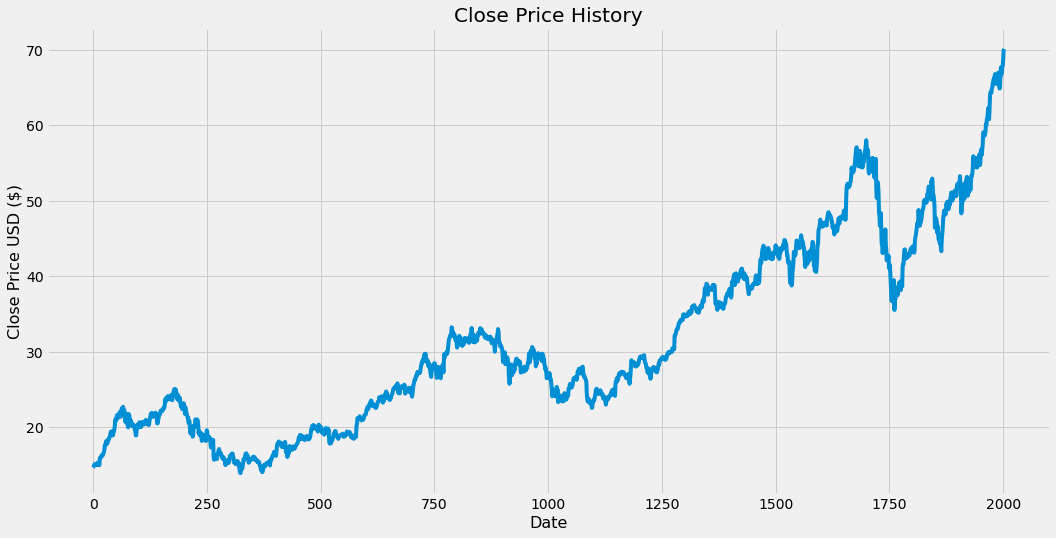

In [16]:
#Visualize the clsoing price history 
plt.figure(figsize=(16,8))
plt.title ('Close Price History')
plt.plot(df['Close'])
plt.xlabel ('Date', fontsize=16)
plt.ylabel ('Close Price USD ($)',fontsize =16)
plt.show 

In [10]:
# Create a new dataframe with only the "Close column"
data = df.filter (['Close'])
# Convert the dataframe to a numpy array 
dataset = data.values 
#Get the number of rows to train the model on
training_data_len =math.ceil (len(dataset) * .8 )
training_data_len

1603

In [11]:
#Sclae the data 
scaler = MinMaxScaler (feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset) 

scaled_data 

array([[0.0131651 ],
       [0.01457063],
       [0.01748986],
       ...,
       [0.97658262],
       [0.99755133],
       [1.        ]])

In [12]:
# Create the training data set 
# Create the scaled training data set 
train_data = scaled_data [0:training_data_len,:]
#Split the data into x_train and y_train data sets 
x_train = []
y_train = []

for i in range(60,len(train_data)):
 x_train.append(train_data[i-60:i,0])
 y_train.append(train_data[i,0])
 if i <= 60: 
   print(x_train)
   print(y_train)
   print ()

[array([0.0131651 , 0.01457063, 0.01748986, 0.02026915, 0.01984304,
       0.02080338, 0.02036454, 0.0196268 , 0.01862192, 0.02173194,
       0.02453667, 0.02367173, 0.01893356, 0.02345549, 0.01900353,
       0.03569839, 0.03440732, 0.03609271, 0.03973694, 0.04194383,
       0.04175942, 0.04107891, 0.04397904, 0.04670743, 0.0497984 ,
       0.05479095, 0.0652785 , 0.0654375 , 0.07127595, 0.07563886,
       0.0681405 , 0.07102789, 0.07097067, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600557, 0.09214292, 0.09661394,
       0.09790501, 0.0983566 , 0.09071196, 0.08886754, 0.08914104,
       0.09632779, 0.09835024, 0.10269409, 0.11293359, 0.12659476,
       0.12403805, 0.12404441, 0.13392141, 0.13701237, 0.1348118 ,
       0.13280208, 0.13070964, 0.13766104, 0.14243104, 0.14442806])]
[0.139492723007876]



In [13]:
#Convert the x_train and y_train to numpy arrays 
x_train,y_train = np.array(x_train), np.array(y_train)

In [14]:
#Reshape the data 
x_train = np.reshape (x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape 


(1543, 60, 1)

In [17]:
#Build the LSTM Model 
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape =(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
#Compile the model 
model.compile(optimizer ='adam',loss='mean_squared_error')

In [19]:
#Train the model 
model.fit(x_train,y_train,batch_size=1,epochs=1)

1543/1543 [==============================] - 46s 27ms/step - loss: 5.8784e-04


In [20]:
#Created the testing data set 
#Created a new arrray containing sclaed values from index 1543 to 2003
test_data = scaled_data [training_data_len - 60: , :]
#Created the data sets x_test and y_test 
x_test = []
y_test = dataset [training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [21]:
#Convert the data to a numpy array 
x_test = np.array(x_test)

In [22]:
#Reshape the data set 
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
# Get the models predicted price values 
predictions = model.predict (x_test)
predictions = scaler.inverse_transform(predictions)

In [26]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt (np.mean(predictions - y_test)**2)
rmse

3.27637874520874

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


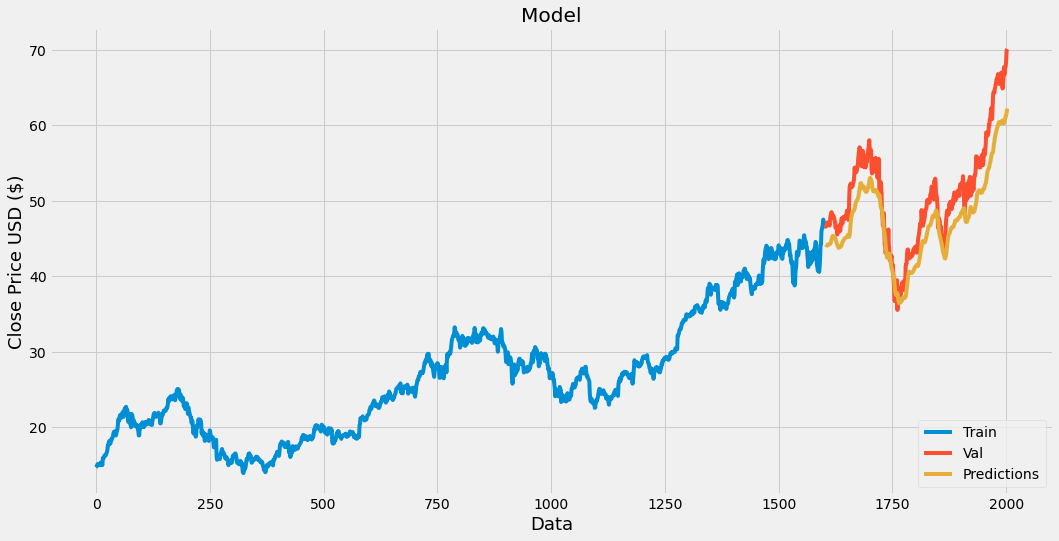

In [38]:
# Plot the data 
train = data[:training_data_len]
valid = data [training_data_len:]
valid['Predictions']= predictions
# Visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [39]:
#Valid 
valid 

,Close,Predictions
1603,46.747501,44.217026
1604,46.577499,44.174747
1605,46.907501,44.098713
1606,46.790001,44.075363
1607,47.090000,44.064922
...,...,...
1998,67.692497,60.934372
1999,67.864998,61.169605
2000,68.787498,61.402657
2001,69.964996,61.730396


In [40]:
# Get the quote 
apple_quote = web.DataReader ('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
#Created a new dataframe 
new_df = apple_quote.fliter (['Close'])
#Get the last 60 day closing price values and convert the dataframe to set an array 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1 
last_60_days_scaled= scaler.transfrom(last_60_days)
#Created an empty list 
x_test = []
#Append the past 60 days 
X_test.append(last_60_days_scaled)


RemoteDataError: ignored